# Model Creation 

# Importing Libraries

In [1474]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

# Reading FRED Data

In [1475]:
lf = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/CIVPART.csv')

In [1476]:
cpi = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/CPIAUCSL.csv')

In [1477]:
ir = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/FEDFUNDS.csv')

In [1478]:
gdp = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/GDPC1.csv')

In [1479]:
ipman = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/IPMAN.csv')

In [1480]:
unr = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/UNRATE.csv')

In [1481]:
velo = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/M2V.csv')

In [1482]:
socsec = pd.read_csv(r'/Users/ryangeorge/GitHub Projects/Unemployment-Prediction-Deep-Learning/Data/SOCSEC.csv')

## Merged Dataset

In [1483]:
df = pd.merge(lf, cpi, on='DATE')
df = pd.merge(df, ir, on='DATE')
df = pd.merge(df, gdp, on='DATE')
df = pd.merge(df, ipman, on='DATE')
df = pd.merge(df, unr, on='DATE')
df = pd.merge(df, velo, on='DATE')
df = pd.merge(df, socsec, on='DATE')

In [1484]:
df.head()

,DATE,CIVPART,CPIAUCSL,FEDFUNDS,GDPC1,IPMAN,UNRATE,M2V,W823RC1
0,1972-01-01,60.300000,41.333333,3.546667,5632.649,36.211533,5.766667,1.696,38.300000
1,1972-04-01,60.400000,41.600000,4.300000,5760.470,36.959000,5.700000,1.703,38.733333
2,1972-07-01,60.466667,41.933333,4.743333,5814.854,37.466500,5.566667,1.679,39.300000
3,1972-10-01,60.366667,42.366667,5.146667,5912.220,38.890933,5.366667,1.673,47.466667
4,1973-01-01,60.433333,43.033333,6.536667,6058.544,40.181267,4.933333,1.694,49.066667


In [1485]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Data Visualization

Text(0.5, 0, 'Date')

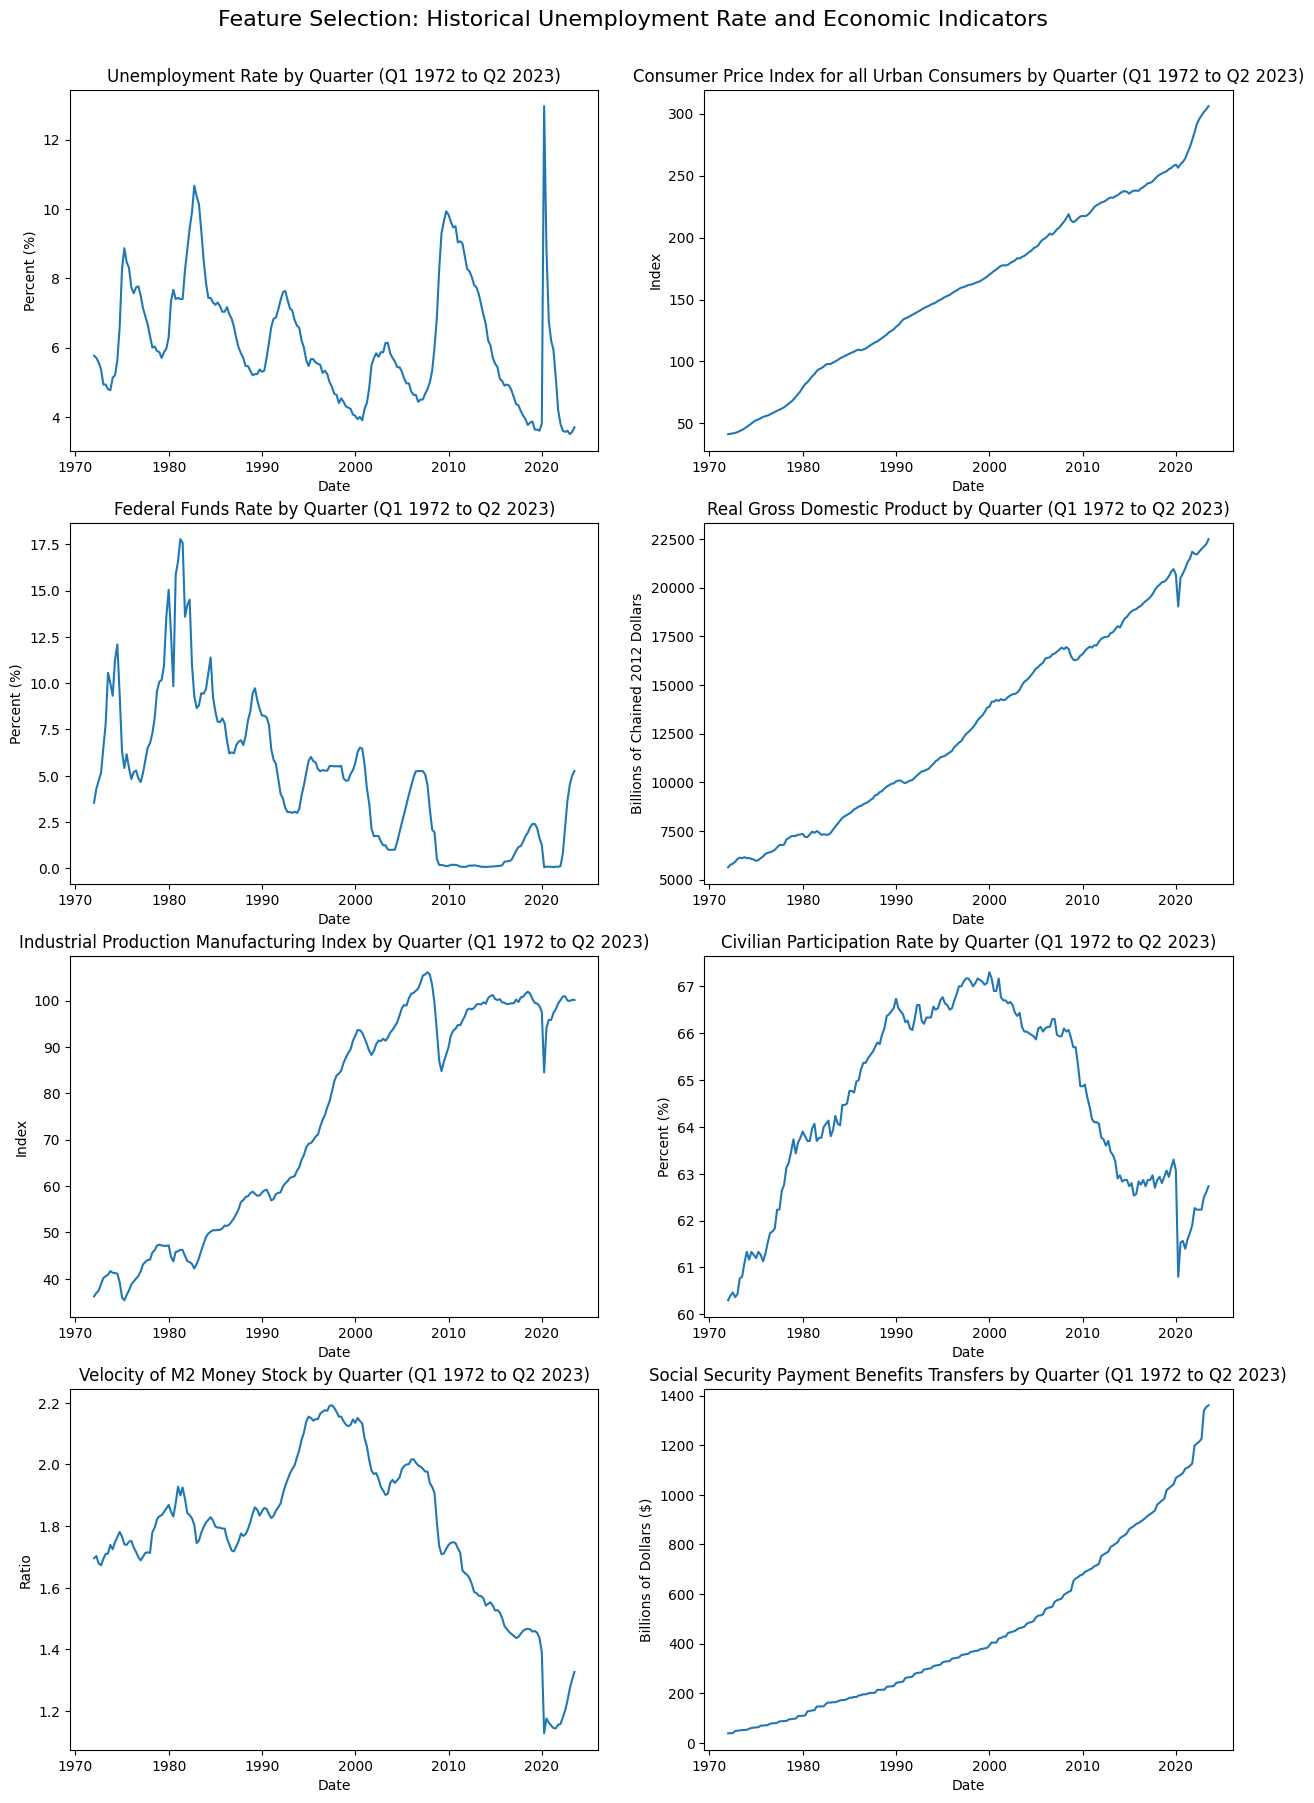

In [1486]:
fig, axis = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Feature Selection: Historical Unemployment Rate and Economic Indicators', fontsize=16)
fig.subplots_adjust(top=0.94)  # Adjust the spacing between super title and subplots

axis[0, 0].plot(df['DATE'], df['UNRATE'])
axis[0, 0].set_title('Unemployment Rate by Quarter (Q1 1972 to Q2 2023)')
axis[0, 0].set_ylabel('Percent (%)')
axis[0, 0].set_xlabel('Date')

axis[0, 1].plot(df['DATE'], df['CPIAUCSL'])
axis[0, 1].set_title('Consumer Price Index for all Urban Consumers by Quarter (Q1 1972 to Q2 2023)')
axis[0, 1].set_ylabel('Index')
axis[0, 1].set_xlabel('Date')

axis[1, 0].plot(df['DATE'], df['FEDFUNDS'])
axis[1, 0].set_title('Federal Funds Rate by Quarter (Q1 1972 to Q2 2023)')
axis[1, 0].set_ylabel('Percent (%)')
axis[1, 0].set_xlabel('Date')

axis[1, 1].plot(df['DATE'], df['GDPC1'])
axis[1, 1].set_title('Real Gross Domestic Product by Quarter (Q1 1972 to Q2 2023)')
axis[1, 1].set_ylabel('Billions of Chained 2012 Dollars')
axis[1, 1].set_xlabel('Date')

axis[2, 0].plot(df['DATE'], df['IPMAN'])
axis[2, 0].set_title('Industrial Production Manufacturing Index by Quarter (Q1 1972 to Q2 2023)')
axis[2, 0].set_ylabel('Index')
axis[2, 0].set_xlabel('Date')

axis[2, 1].plot(df['DATE'], df['CIVPART'])
axis[2, 1].set_title('Civilian Participation Rate by Quarter (Q1 1972 to Q2 2023)')
axis[2, 1].set_ylabel('Percent (%)')
axis[2, 1].set_xlabel('Date')

axis[3, 0].plot(df['DATE'], df['M2V'])
axis[3, 0].set_title('Velocity of M2 Money Stock by Quarter (Q1 1972 to Q2 2023)')
axis[3, 0].set_ylabel('Ratio')
axis[3, 0].set_xlabel('Date')

axis[3, 1].plot(df['DATE'], df['W823RC1'])
axis[3, 1].set_title('Social Security Payment Benefits Transfers by Quarter (Q1 1972 to Q2 2023)')
axis[3, 1].set_ylabel('Billions of Dollars ($)')
axis[3, 1].set_xlabel('Date')

In [1487]:
data = df.iloc[:,1:]
corr_data = data.corr()

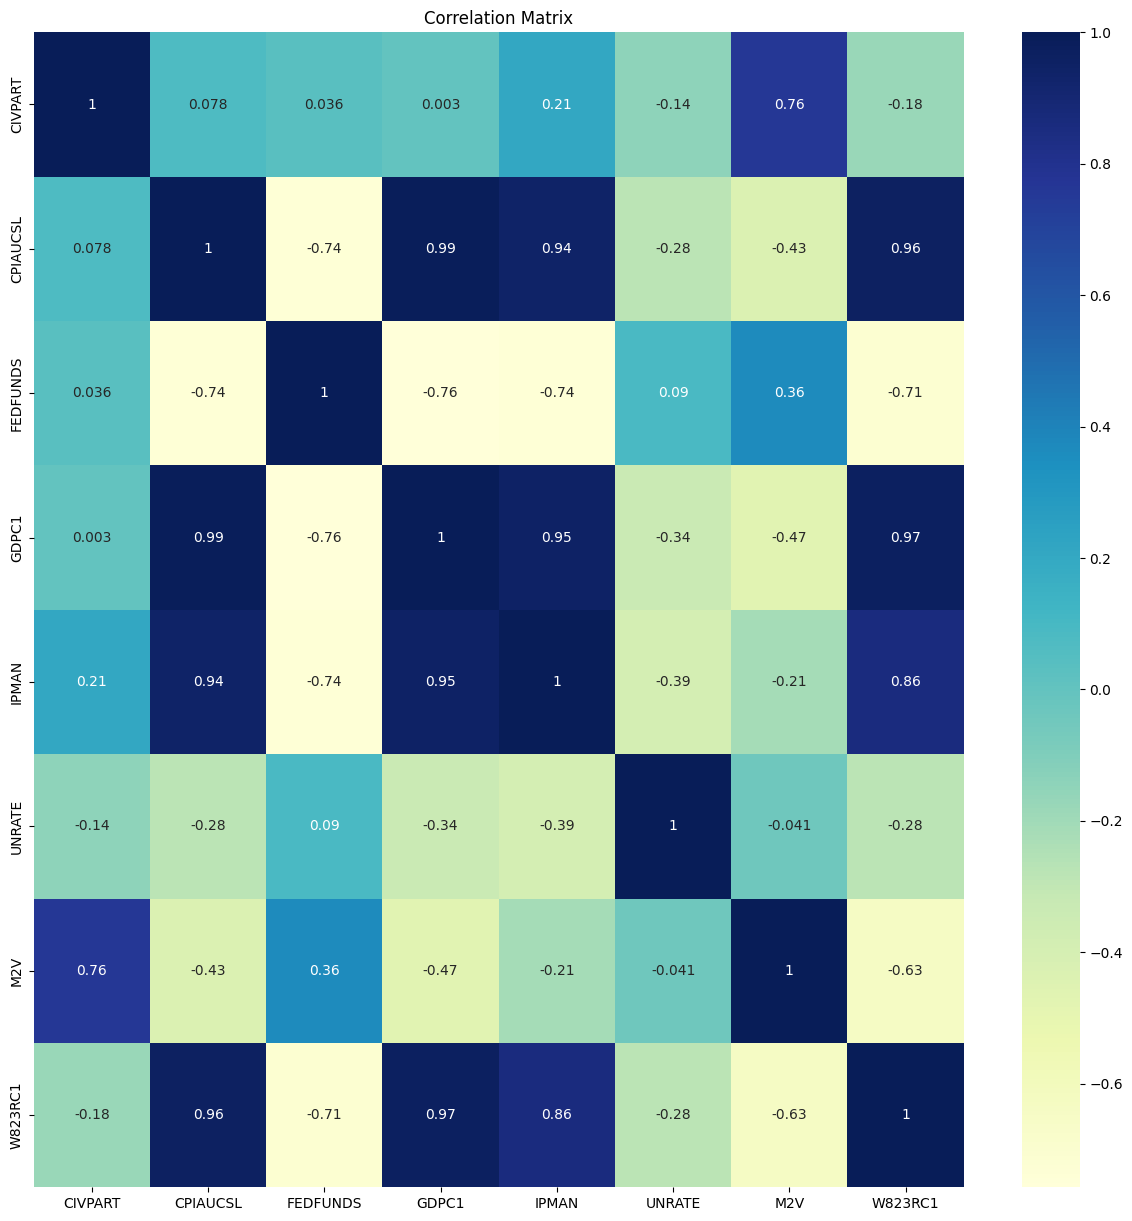

In [1488]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_data, annot=True, cmap='YlGnBu',xticklabels=data.columns, yticklabels=data.columns)
plt.title('Correlation Matrix')
plt.show()

# Model Implementation

In [1489]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Dropout

In [1490]:
X = df.iloc[:,1:]
y = df['UNRATE']

In [1491]:
y_lagged = y.shift(1).dropna()
X_lagged = X.iloc[1:]

# Shape tuple for LSTM input 
X_lagged = X_lagged.values.reshape(X_lagged.shape[0], 1, X_lagged.shape[1])
y_lagged = y_lagged.values.reshape(y_lagged.shape[0], 1, 1)

In [1492]:
X_train,X_test, y_train, y_test = train_test_split(X_lagged, y_lagged, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## LSTM

In [1493]:
lstm_model = Sequential()

In [1494]:
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

In [1495]:
lstm_model.add(Dense(1))

In [1496]:
lstm_model.compile(optimizer='adam', loss='mean_absolute_error')

In [1497]:
lstm_model.fit(X_train, y_train, epochs=500, batch_size=36, validation_data=(X_val, y_val))

Epoch 1/500
4/4 [==============================] - 1s 40ms/step - loss: 627.7206 - val_loss: 558.2805
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 548.8632 - val_loss: 480.7525
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 468.4085 - val_loss: 404.3981
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 389.7507 - val_loss: 328.4683
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 312.9060 - val_loss: 253.5292
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 237.5633 - val_loss: 182.2348
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 164.7579 - val_loss: 111.6089
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 92.5175 - val_loss: 41.3401
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 23.4544 - val_loss: 24.5334
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 36.8231 - val_loss: 51

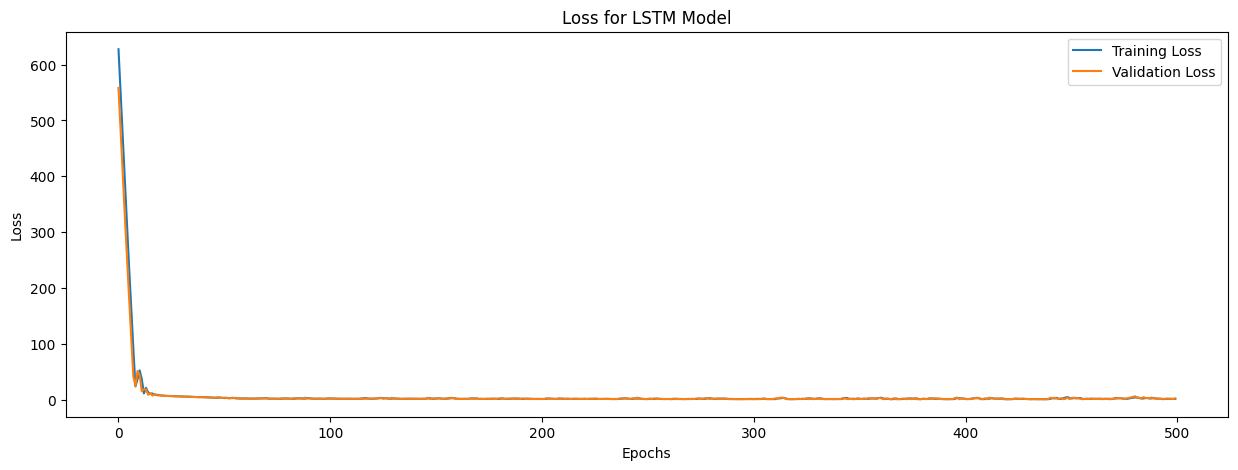

In [1498]:
# Visualize the loss
plt.figure(figsize=(15, 5))
plt.plot(lstm_model.history.history['loss'], label='Training Loss')
plt.plot(lstm_model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Artifical Neural Network

In [1499]:
ann_model = Sequential()
ann_model.add(Flatten())

In [1500]:
ann_model.add(Dense(50, activation='softmax', input_dim=X_train.shape[1]))

In [1501]:
ann_model.add(Dense(1))

In [1502]:
ann_model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.legacy.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

In [1503]:
ann_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, batch_size=36, validation_data=(tf.expand_dims(X_val, axis=-1), y_val))

Epoch 1/500
4/4 [==============================] - 0s 23ms/step - loss: 6.1615 - mae: 6.1615 - val_loss: 6.3918 - val_mae: 6.3918
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 6.0815 - mae: 6.0815 - val_loss: 6.3118 - val_mae: 6.3118
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 6.0015 - mae: 6.0015 - val_loss: 6.2318 - val_mae: 6.2318
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 5.9215 - mae: 5.9215 - val_loss: 6.1518 - val_mae: 6.1518
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 5.8415 - mae: 5.8415 - val_loss: 6.0718 - val_mae: 6.0718
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 5.7615 - mae: 5.7615 - val_loss: 5.9918 - val_mae: 5.9918
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 5.6815 - mae: 5.6815 - val_loss: 5.9118 - val_mae: 5.9118
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 5.6015 - mae: 5.6015 - va

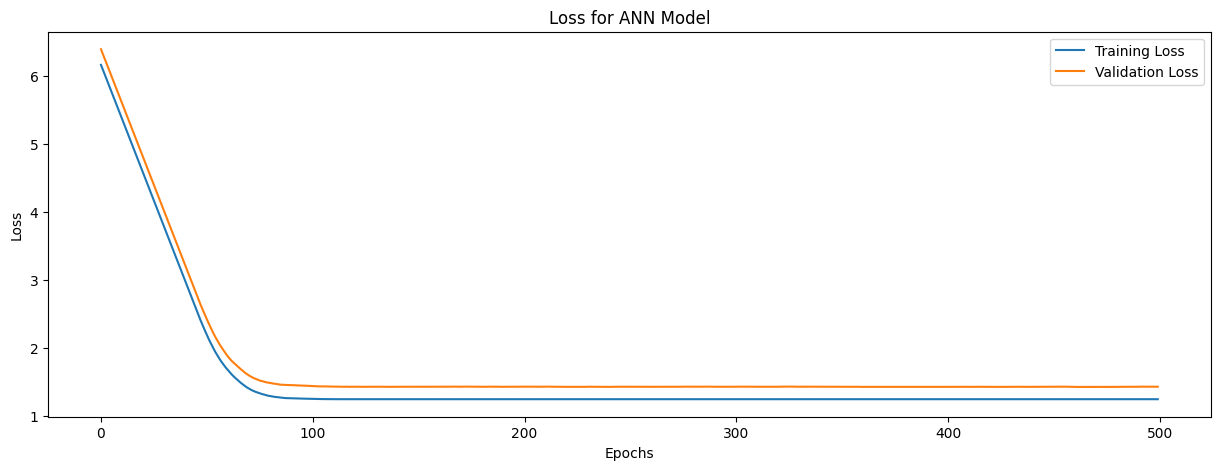

In [1504]:
# Visualize the loss
plt.figure(figsize=(15, 5))
plt.plot(ann_model.history.history['loss'], label='Training Loss')
plt.plot(ann_model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss for ANN Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [1505]:
lstm_predictions = lstm_model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [1506]:
ann_predictions = ann_model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [1507]:
ensemble_predictions = (lstm_predictions + ann_predictions) / 2

In [1508]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [1509]:
y_test = y_test.reshape(-1, 1)
ensemble_predictions_2 = ensemble_predictions.reshape(-1, 1)

# Calculate MSE
mse = mean_squared_error(y_test, ensemble_predictions_2)

In [1510]:
mse = mean_squared_error(y_test, ensemble_predictions_2)
mse

13.7334524958839

In [1511]:
mae = mean_absolute_error(y_test, ensemble_predictions)
mae

3.3703104897150924

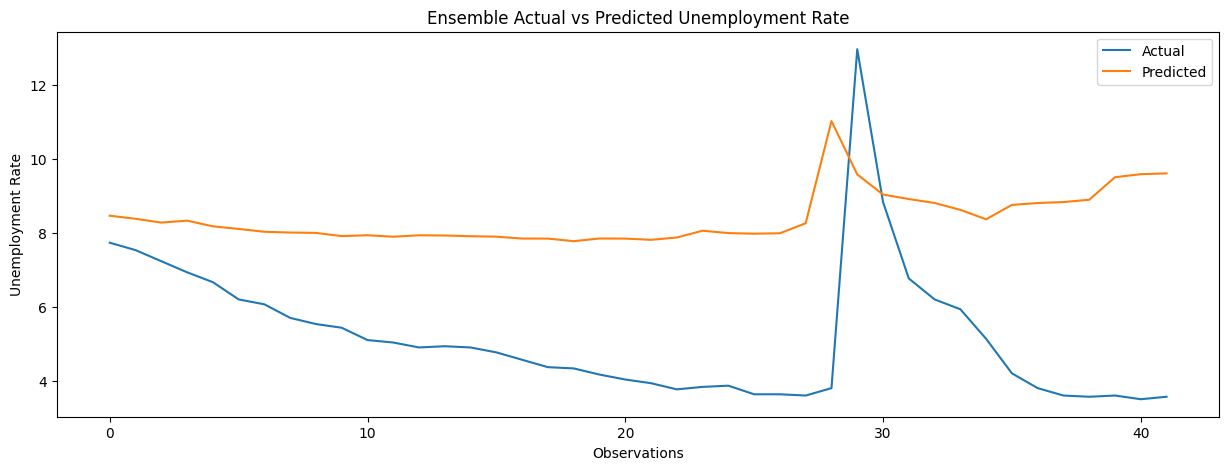

In [1512]:
# Times series plot of actual vs predicted
plt.figure(figsize=(15, 5))
plt.plot(y_test, label='Actual')
plt.plot(ensemble_predictions_2, label='Predicted')
plt.title('Ensemble Actual vs Predicted Unemployment Rate')
plt.xlabel('Observations')
plt.ylabel('Unemployment Rate')
plt.legend()
